# 트럼프 트위터 분석

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
trump = pd.read_csv('realdonaldtrump.csv')
trump

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN
...,...,...,...,...,...,...,...,...
43347,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,NaN,NaN
43348,1273408026968457216,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659,@seanhannity,NaN
43349,1273442195161387008,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344,NaN,NaN
43350,1273442469066276864,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022,NaN,NaN


## 데이터 전 처리

In [31]:
# 'date'에 따른 사람들의 반응을 분석하기 위한 데이터 전처리
list_date = []
for date in trump['date']:
    cleaned_date = date[0:8].replace('-','')
    list_date.append(cleaned_date)

##  선거 운동 기간에 트위터를 가장 많이 이용함.

<AxesSubplot:xlabel='year'>

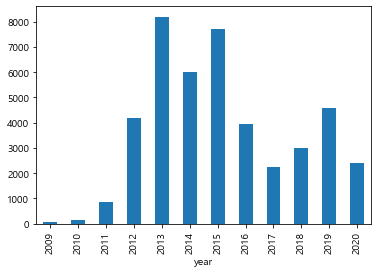

In [21]:
trump['date'] = pd.to_datetime(trump['date'])
trump['year'] = trump['date'].dt.year
trump.set_index('year',inplace = True)
group_year = trump.groupby('year')

group_year.size().plot.bar()

## 가장 많이 사용한 단어, 해시태그, 멘션 단어 구름
### → 트럼프가 트위터를 통해 전하고 싶은 내용

In [3]:
#결측치 조회
print(realtrump.info(), realtrump.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43352 entries, 0 to 43351
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         43352 non-null  int64 
 1   link       43352 non-null  object
 2   content    43352 non-null  object
 3   date       43352 non-null  object
 4   retweets   43352 non-null  int64 
 5   favorites  43352 non-null  int64 
 6   mentions   20386 non-null  object
 7   hashtags   5583 non-null   object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB
None id               0
link             0
content          0
date             0
retweets         0
favorites        0
mentions     22966
hashtags     37769
dtype: int64


In [4]:
#content에서 picture 제거
content_tweet = realtrump[~realtrump['content'].str.contains('pic.twitter.com/')]
content_tweet.reset_index(drop = True, inplace = True)
content_tweet

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN
...,...,...,...,...,...,...,...,...
39662,1273061883399098368,https://twitter.com/realDonaldTrump/status/127...,True!https://twitter.com/realdonaldtrump/statu...,2020-06-16 20:16:20,26783,154978,NaN,NaN
39663,1273080720794279937,https://twitter.com/realDonaldTrump/status/127...,A GREAT woman. Her son is looking down from he...,2020-06-16 21:31:11,26468,112140,NaN,NaN
39664,1273095002563006472,https://twitter.com/realDonaldTrump/status/127...,96% Approval Rating in the Republican Party. T...,2020-06-16 22:27:56,44472,313534,NaN,NaN
39665,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,NaN,NaN


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
from collections import Counter
from nltk.corpus import stopwords
import re

word = []
stop_words = set(stopwords.words('english')) #불용어(영어)
stop_words.update(('and'))
for i in content_tweet['content']:
    i = re.sub(r'[^ A-Za-z]','', i)
    i.replace('@', '').replace('#', '') # mention이랑 hashtag문자 삭제
    for w in i.lower().split():
        if w not in stop_words :#불용어 제거
           word.append(w)
word_count = Counter(word).most_common(n = 10)
print(word_count)# 제일 많은 단어 40개 빈도수 출력
word_count10 = [] # 제일 많은 단어 40개 저장
for i in range(0,40):
    word_count40.append(Counter(word).most_common(n = 40)[i][0])

[('realdonaldtrump', 8246), ('great', 5919), ('trump', 5508), ('president', 2770), ('people', 2525), ('thank', 2231), ('thanks', 2096), ('us', 2081), ('would', 1962), ('get', 1845)]


In [7]:
#최대 멘션
all_mention = []
tweet_mentions = content_tweet['mentions'].dropna()
for i in tweet_mentions:
        all_mention.append(i.replace('@','')) #맨션 기호 삭제
print(Counter(all_mention).most_common(n = 30))
mention_count30 = []
for i in range(0,30):
    mention_count30.append(Counter(all_mention).most_common(n = 30)[i][0])

[('realDonaldTrump', 1198), ('BarackObama', 541), ('foxandfriends', 295), ('FoxNews', 203), ('MittRomney', 157), ('nytimes', 113), ('CNN', 107), ('Macys', 63), ('ApprenticeNBC', 61), ('billmaher', 58), ('Newsmax', 43), ('Yankees', 43), ('VanityFair', 40), ('BreitbartNews', 40), ('AlexSalmond', 39), ('CelebApprentice', 38), ('SquawkCNBC', 38), ('oreillyfactor', 34), ('JebBush', 34), ('IvankaTrump', 33), ('Lord', 33), ('gretawire', 32), ('GOP', 32), ('TrumpTowerNY', 32), ('megynkelly', 32), ('AGSchneiderman', 31), ('LouDobbs', 31), ('BarackObama,MittRomney', 30), ('seanhannity', 29), ('MittRomney,BarackObama', 29)]


In [8]:
# 최대 hashtag
all_hashtag = []
tweet_hashtags = content_tweet['hashtags'].dropna()
for i in tweet_hashtags:
    all_hashtag.append(i.replace('#','')) #hashtag 기호 삭제
print(Counter(all_hashtag).most_common(n = 30))
hashtag_count30 = []
for i in range(0,30):
    hashtag_count30.append(Counter(all_hashtag).most_common(n = 30)[i][0])

[('Trump2016', 315), ('CelebApprentice', 245), ('MakeAmericaGreatAgain', 149), ('CelebrityApprentice', 113), ('1', 106), ('MAGA', 105), ('TimeToGetTough', 99), ('trumpvlog', 52), ('trump2016', 43), ('Trump', 29), ('2016', 29), ('Oscars', 26), ('TrumpForPresident', 26), ('MAGAhttps', 26), ('TrumpTuesday', 25), ('DemDebate', 21), ('Trump2016https', 19), ('TRUMP', 17), ('WWEHOF', 17), ('Trump2016,MakeAmericaGreatAgain', 17), ('sweepstweet', 15), ('GOPDebate', 15), ('VPDebate', 14), ('MissUniverse', 13), ('Trump16', 13), ('trumpforpresident', 12), ('2A', 12), ('MakeAmericaGreatAgain,Trump2016', 12), ('DrainTheSwamp', 12), ('MAGA,2A', 12)]


## 단어, 멘션 해시태그 워드 클라우드

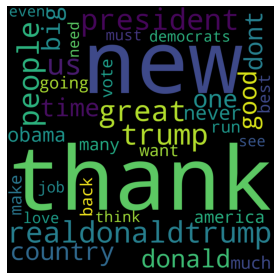

In [26]:
# 상위 40개 단어 wordcloud
import matplotlib.pyplot as plt
# 문자열 결합
word_data_10 = ' '.join(word_count10)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 1000, height = 1000, 
                     ).generate(word_data_40) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

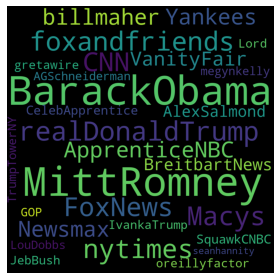

In [10]:
# 상위 30개 맨션 wordcloud
import matplotlib.pyplot as plt
# 문자열 결합
mention_data_30 = ' '.join(mention_count30)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 1000, height = 1000, 
                     ).generate(mention_data_30) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

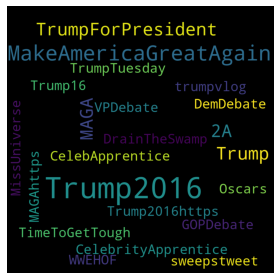

In [11]:
# 상위 30 hashtag wordcloud
import matplotlib.pyplot as plt
# 문자열 결합
hashtag_data_30 = ' '.join(hashtag_count30)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 1000, height = 1000, 
                     ).generate(hashtag_data_30) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

## 월별 가장 많이 사용한 단어 막대 그래프

C:\Users\82108\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\82108\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


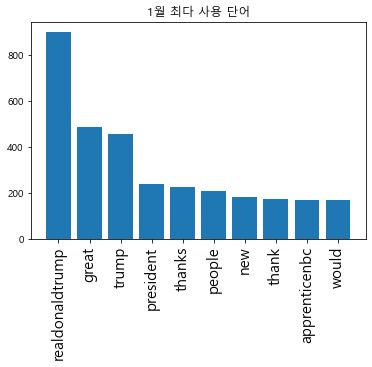

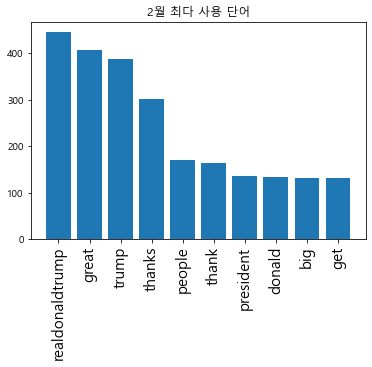

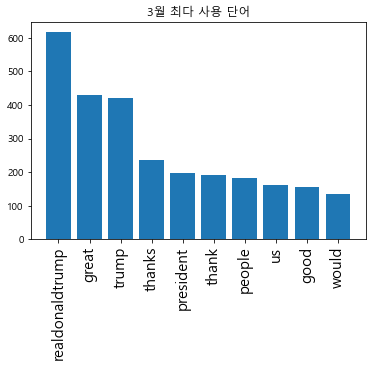

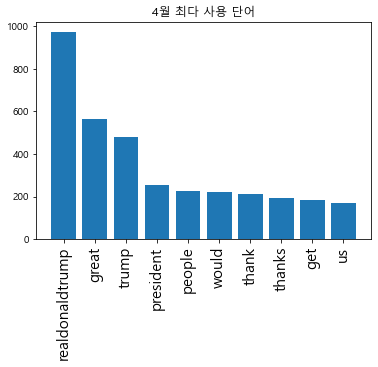

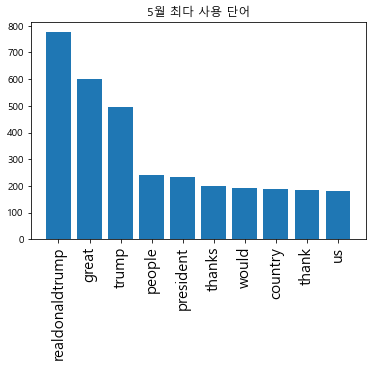

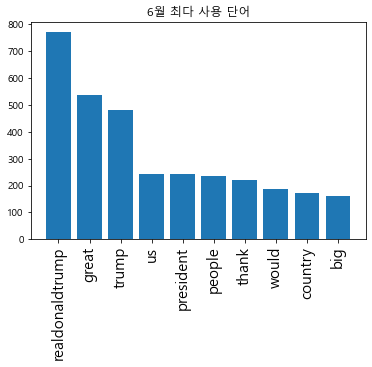

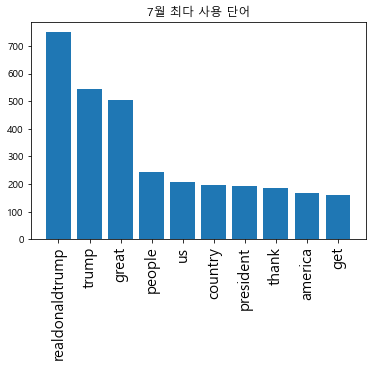

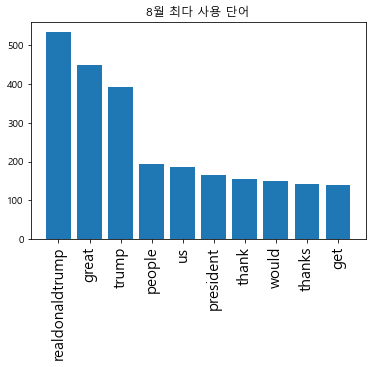

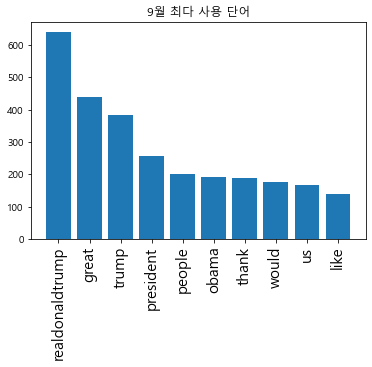

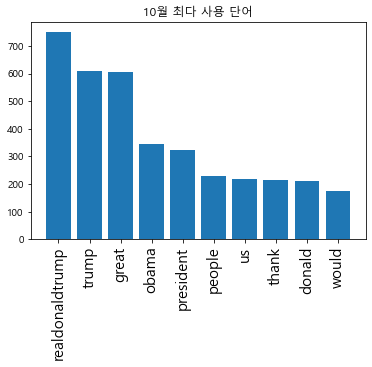

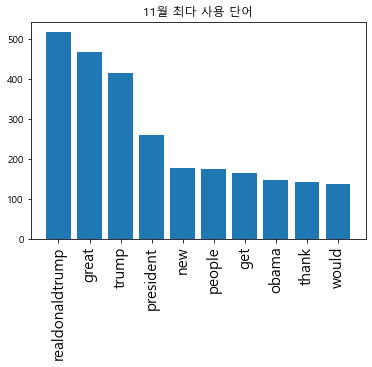

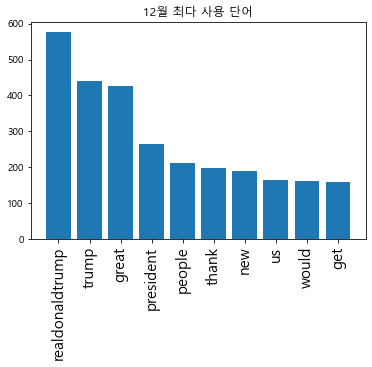

In [12]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

monthly_word = pd.DataFrame(['','','','','','','','','','','',''], columns = ['words'])
monthly_word.index = ['1','2','3','4','5','6','7','8','9','10','11','12']
content_tweet.loc[:,'month'] = content_tweet.date.str.split('-').str[1]
# content_tweet
for i in range(len(content_tweet)):
    month = str(int(content_tweet.loc[i,'month']))
    monthly_word.loc[month,'words'] =  monthly_word.loc[month, 'words'] + ' ' +content_tweet.loc[i,'content']

stop_words = set(stopwords.words('english')) #불용어(영어)
stop_words.update(('and'))

for i in range(1, 13):
    words = monthly_word.loc[str(i),'words']
    words = re.sub(r'[^ A-Za-z]','', words)
    words.replace('@', '').replace('#', '') # mention이랑 hashtag문자 삭제
    tmp = []
    for w in words.lower().split():#불용어 제거
        if w not in stop_words:
            tmp.append(w)
    x = []
    y = []
    for j in range(0, 10):
        x.append(Counter(tmp).most_common(n = 10)[j][0])
        y.append(Counter(tmp).most_common(n = 10)[j][1])
   
    plt.bar(x,y)
    plt.xticks(x, fontsize = 15, rotation = 90)
    plt.title('{}월 최다 사용 단어'.format(i))
    plt.show()

## 월별 리트윗 막대 그래프

C:\Users\82108\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


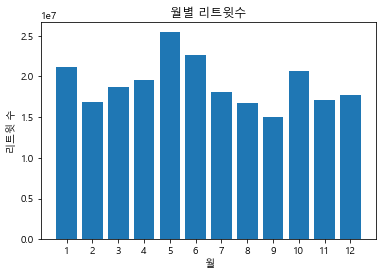

In [13]:

monthly_retweets = pd.DataFrame([0,0,0,0,0,0,0,0,0,0,0,0], columns = ['retweets'])
monthly_retweets.index = ['1','2','3','4','5','6','7','8','9','10','11','12']
content_tweet.loc[:,'month'] = content_tweet.date.str.split('-').str[1]
# content_tweet
for i in range(len(content_tweet)):
    month = str(int(content_tweet.loc[i,'month']))
    monthly_retweets.loc[month,'retweets'] = monthly_retweets.loc[month,'retweets'] + int(content_tweet.loc[i,'retweets'])
monthly_retweets
plt.bar(monthly_retweets.index, monthly_retweets.retweets)
plt.xlabel('월')
plt.ylabel('리트윗 수')
plt.title('월별 리트윗수')
plt.show()

## 트윗 시간대 막대그래프

In [14]:
content_tweet

,id,link,content,date,retweets,favorites,mentions,hashtags,month
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN,05
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN,05
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN,05
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN,05
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN,05
...,...,...,...,...,...,...,...,...,...
39662,1273061883399098368,https://twitter.com/realDonaldTrump/status/127...,True!https://twitter.com/realdonaldtrump/statu...,2020-06-16 20:16:20,26783,154978,NaN,NaN,06
39663,1273080720794279937,https://twitter.com/realDonaldTrump/status/127...,A GREAT woman. Her son is looking down from he...,2020-06-16 21:31:11,26468,112140,NaN,NaN,06
39664,1273095002563006472,https://twitter.com/realDonaldTrump/status/127...,96% Approval Rating in the Republican Party. T...,2020-06-16 22:27:56,44472,313534,NaN,NaN,06
39665,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,NaN,NaN,06


In [15]:
import numpy as np
# 시간대별 트윗 갯수 및 그 트윗의 리트윗
tweet_time = pd.DataFrame(np.reshape([0 for i in range(0, 48)], (24,2)),  columns = ['tweets','total_retweets'])
content_tweet['dt2'] = pd.to_datetime(content_tweet['date'], format='%Y-%m-%d %H:%M', errors='raise')
content_tweet['time'] = content_tweet['dt2'].dt.hour

for i in range(len(content_tweet)):
    t = content_tweet.loc[i,'time']
    tweet_time.loc[t, 'tweets'] = tweet_time.loc[t, 'tweets'] + 1 # 트윗갯수
    tweet_time.loc[t, 'total_retweets'] = tweet_time.loc[t,'total_retweets'] + int(content_tweet.loc[i,'retweets'])

tweet_time

<ipython-input-15-5b4a7946f082>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_tweet['dt2'] = pd.to_datetime(content_tweet['date'], format='%Y-%m-%d %H:%M', errors='raise')
<ipython-input-15-5b4a7946f082>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_tweet['time'] = content_tweet['dt2'].dt.hour


,tweets,total_retweets
0,387,1046700
1,325,276716
2,313,449390
3,420,435740
4,581,1464373
5,1403,13135519
6,2266,22632874
7,2509,26651155
8,2612,20908738
9,2435,18008475


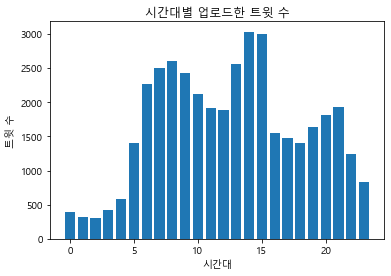

In [16]:
plt.bar(tweet_time.index, tweet_time.tweets)
plt.xlabel('시간대')
plt.ylabel('트윗 수')
plt.title('시간대별 업로드한 트윗 수')
plt.show()

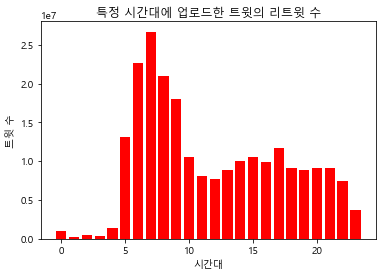

In [17]:
plt.bar(tweet_time.index, tweet_time.total_retweets, color = 'r')
plt.xlabel('시간대')
plt.ylabel('트윗 수')
plt.title('특정 시간대에 업로드한 트윗의 리트윗 수')
plt.show()

## 선거기간에 가까울 수록 리트윗, 좋아요가 많아질 것

<AxesSubplot:xlabel='date'>

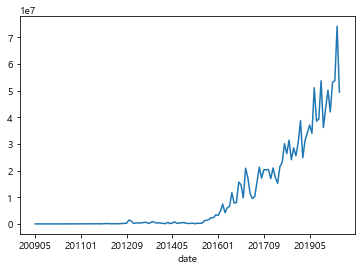

In [38]:
# 원본 보호를 위해 데이터프레임 copy
trump_copy = trump.copy()
trump_copy['date'] = list_date # 연월일 데이터만 포함된 날짜 리스트

# retweet과 'favorite'의 수를 합한 'response' 컬럼 생성
trump_copy['response'] = trump_copy['retweets'] + trump_copy['favorites']
trump_date = trump_copy.groupby('date').sum()
trump_response = trump_date['response']
trump_response.plot()